In [1]:
import matplotlib.image as mpimg
from utils import *

In [2]:
img = mpimg.imread('joconde.jpg')  

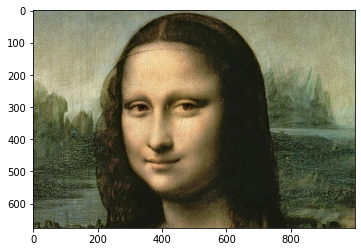

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = rgb2gray(img)

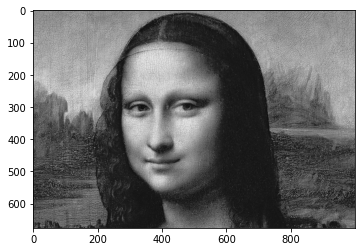

In [5]:
plot_gray(gray)

In [6]:
center = [300,430]
radius = 290

In [7]:
gray_crop = crop_image_circle(gray,center,radius)

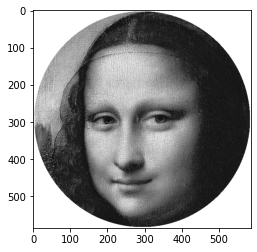

In [8]:
plot_gray(gray_crop)

In [ ]:
nail_positions = generate_nail_positions(radius, 10, gray_crop.shape,True)
nail_positions

In [ ]:
line=[[200,100],[500,400]]
plot_gray(generate_line_matrix(line,gray_crop.shape))

In [ ]:
tmp = generate_line_matrix(line,gray_crop.shape)
plot_gray(add_line(4,8, nail_positions, tmp))

In [16]:
number = 300
threshold = 1
res = 255*np.ones(shape=(gray_crop.shape))
nail_positions = generate_nail_positions(radius, number, gray_crop.shape,True)
current_idx = -1

In [18]:
for n in range(4000):
    if n%10==0:
        print(n,end='')
    m = math.inf
    possible_next_ways = possible_next_nails(current_idx, len(nail_positions),threshold,True)
    for i in possible_next_ways:   
        #print(i)
        tmp_res = add_line(current_idx,i,nail_positions,res,0.9)       
        tmp_m = distance_image(tmp_res,gray_crop)
        if tmp_m < m:
            m = tmp_m
            min_res = tmp_res
            next_position = i
    if current_idx == next_position:
        print('break')
        break
    res = min_res
    current_idx = next_position
    if n%10==0:
            print("  distance: "+str(m))
plot_gray(res)

0  distance: 79786.67400379298
10  distance: 79582.5338046765
20  distance: 79375.13479824083
30  distance: 79171.72834705135
40  distance: 78969.52789620565
50  distance: 78764.40153257085
60  distance: 78559.49098975268
70  distance: 78355.3812105688
80  distance: 78152.5079100109
90  distance: 77953.43002281568
100  distance: 77751.87515239949
110  distance: 77551.13024797285
120  distance: 77352.47218154202
130  distance: 77153.67753976502
140  distance: 76955.92817360746
150  distance: 76763.56114364187
160  distance: 76566.32860177991
170  distance: 76369.47530843448
180  distance: 76173.79251226956
190  distance: 75978.66262320467
200  distance: 75784.22570592076
210  distance: 75591.54975910141
220  distance: 75397.51154328279
230  distance: 75205.46353653062
240  distance: 75014.3736792754
250  distance: 74824.67484651809
260  distance: 74633.71172503116
270  distance: 74444.27412176898
280  distance: 74255.1264602339
290  distance: 74067.21495596919
300  distance: 73882.69149

KeyboardInterrupt: 

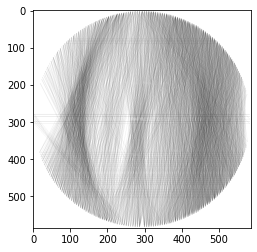

In [19]:
plot_gray(res)